# Laboratoire 0 : Initiation au langage de programmation Python3
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | Alexandre Laroche - LARA12078907                                   |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | E2019                                            |
| Groupe                | 02                                                       |
| Numéro du laboratoire | 00                                                       |
| Professeur            | Prof. Alessandro L. Koarich                                               |
| Chargé de laboratoire | Pierre-Luc Delisle                                                     |
| Date                  | 15 mai 2019                                                    |

## Introduction

L'objectif de ce laboratoire est de vous familiariser avec Python et son environment. Il est important de suivre les étapes de ce cours et de pratiquer. Il est également important de lire la documentation offciel de python.

### Image Handling

Il y a plusieurs façon de charger une image en Python. On peut utiliser cv2(opencv), matplotlib out scikit. Tous ces packages ont une chose en commun, les images chargés par n'importe quel de ces packages se trouveront sous le format matricielle

### Quelques bibliothèques utiles

Il y a beaucoup de bibliothèque en Python, pour ce cours, on vous conseille d'aller lire les informations/tutoriels sur des packages suivant :
1. Scipy  - https://www.scipy.org/
2. Scikit-Learn - http://scikit-learn.org/
3. Scikit-Image - https://scikit-image.org
4. OpenCV - https://opencv.org
5. et d'autres packages sur l'apprentissage machine comme TensorFlow/Keras - http://tensorflow.org / https://keras.io - et PyTorch - https://pytorch.org.


# Exercices

Pour ce premier laboratoire, vous pouvez utiliser les packages random, numpy, math, csv et matplotlib, tous les autres packages sont interdits. 

Vous êtes encouragés à faire des recherches sur Google pour l'utilisation de ces packages. 

Par contre, le copie-coller du code sans compréhension est interdit.

Pour le rendu des labortoires, vous allez rendre les fichiers les rapports sous format de ipynb (ipython notebook). 

Pour chaque exercice, il est demandé de répondre aux question posé et ensuite le code(commenté !!) s'il y a lieu.



# Exercice 1.1

Implémenter la fonction f(x) = x


In [7]:
""""""""""""""""""
"  Exercice 1.1  "
""""""""""""""""""

from numpy import arange

def f(x): 
    return x



# Exercice 1.2

Afficher la fonction f entre -6 et + 6


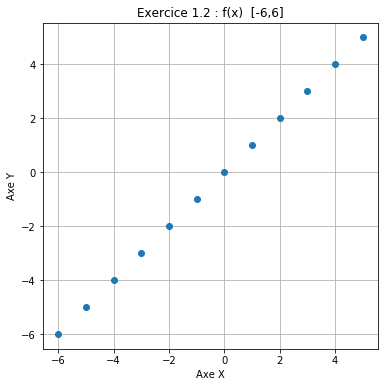

In [8]:
""""""""""""""""""
"  Exercice 1.2  "
""""""""""""""""""

import matplotlib.pyplot as plt

x = arange(-6,6)
y = f(x)

# Information graphique
plt.title("Exercice 1.2 : f(x)  [-6,6]")
plt.ylabel("Axe Y")
plt.xlabel("Axe X")

# Construction graphique
plt.rcParams["figure.figsize"] = [6,6]  # Cell Size
plt.plot(x,y,'o')
plt.grid(True)
plt.show()



# Exercice 1.3

Implémenter la fonction sigmoid (https://en.wikipedia.org/wiki/Sigmoid_function)


In [9]:
""""""""""""""""""
"  Exercice 1.3  "
""""""""""""""""""

import numpy as np

def sigmoid(x):
    sig = (1 / (1 + np.exp(-x)))
    return sig



# Exercice 1.4

Afficher la fonction sigmoid entre -6 et + 6


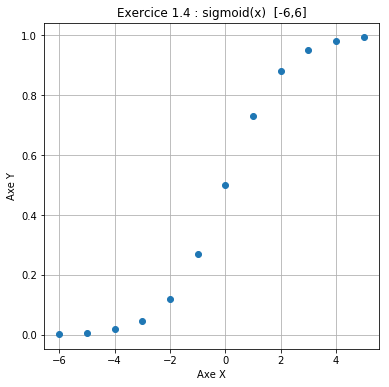

In [10]:
""""""""""""""""""
"  Exercice 1.4  "
""""""""""""""""""

x = arange(-6,6)
y = sigmoid(x)

# Information graphique
plt.title("Exercice 1.4 : sigmoid(x)  [-6,6]")
plt.ylabel("Axe Y")
plt.xlabel("Axe X")

# Construction graphique
plt.plot(x,y,'o')
plt.grid(True)
plt.show()



# Exercice 2.1 - 2.2

En utilisant le fichier data/galaxy/galaxy_label_data_set.csv, charger en mémoire les 50 premières données de chaque classes. 

Toutes les images seront chargées dans une matrice nommée X* et les étiquettes (labels) dans une matrice nommée *Y. 

La matrice X doit avoir la forme (shape dans le jargon Python) NCHW (channel first) : (nombre d'image (N*), nombre de canaux (C), hauteur (H), largeur (W)) et la matrice Y doit avoir la forme (nombre d'image (N), *class_ID).


In [11]:
""""""""""""""""""
"  Exercice 2.2  "
""""""""""""""""""

import numpy as np
import os
import cv2
import sys


# Permet de changer la structure à celle voulue.
def nhwc_to_nchw(liste):
    return np.transpose(np.array(liste), (0,3,1,2))



# Chemin du fichier CVS demandé (galaxy)
FILE_PATH = "./galaxy/galaxy_label_data_set.csv" 

# Répertoire des images (jpg) galaxy
IMAGES_DIR = "./galaxy/galaxy_images"            

# Constantes
MAX_IMAGES = 100  # N
IMG_HEIGHT = 424  # H
IMG_WIDTH = 424   # W
CHANNELS = 3      # C

MAX_SMOOTH = 50
MAX_SPIRAL = 50
SMOOTH = "smooth"
SPIRAL = "spiral"
FORMAT = ".jpg"

# Variables
smooth_count = 0
spiral_count = 0
images_count = 0
is_completed = False


# Verification de l'existence du fichier CSV
if not os.path.isfile(FILE_PATH):
    sys.exit("*** Erreur *** --> Impossible de trouver le fichier CSV:  " + FILE_PATH)
    
# Verification de l'existence du dossier contenant les images (jpg) galaxy
if not os.path.isdir(IMAGES_DIR):
    sys.exit("*** Erreur *** --> Impossible de trouver le dossier images:  " + IMAGES_DIR)


    
# Ouverture et lecture du fichier CSV
file = open(FILE_PATH, "r")

# Construction de la matrice (X,Y)
X = np.zeros((MAX_IMAGES, IMG_HEIGHT, IMG_WIDTH, CHANNELS))
Y = np.zeros(MAX_IMAGES, dtype = "object")

# Listes pour afficher l'information des images "Smooth" et "Spiral"
smooth_array = []
spiral_array = []



# Parcours le fichier CSV ligne par ligne
for i in file :
    
    # Récupère les valeurs de la colonne "id" et de la colonne "class" du fichier CSV
    img_id, img_class = i.split(",")
    
    # Retirer le "\n" après chaque img_class
    img_class = img_class.strip()
    
    # La verification permet de sauter la premiere ligne (titres) du fichier CSV
    if img_id == "id" or img_class == "class" :
        continue
        
    # Limite l'insertion de 50 images "Smooth"
    if SMOOTH in img_class and smooth_count < MAX_SMOOTH : 
        
        # Construction du chemin vers l'image 
        image_path = IMAGES_DIR + "/" + img_id + FORMAT
        
        # Verification de l'existence de l'image
        if not os.path.isfile(image_path):
            print("*** Erreur *** --> Impossible de trouver l'image:  " + image_path)
            break
        
        # Insertion de l'image dans la matrice à une position donnée
        X[images_count] = cv2.imread(image_path)
        Y[images_count] = img_class
        
        # Pour éventuellement afficher seulement la liste d'images "Smooth"
        smooth_array.insert(smooth_count,[img_class,img_id])

        smooth_count += 1
        images_count += 1
   
    # Limite l'insertion de 50 images "Spiral"
    if SPIRAL in img_class and spiral_count < MAX_SPIRAL : 
        
        # Construction du chemin vers l'image 
        image_path = IMAGES_DIR + "/" + img_id + FORMAT
        
        # Verification de l'existence de l'image
        if not os.path.isfile(image_path):
            print("*** Erreur *** --> Impossible de trouver l'image:  " + image_path)
            break
        
        # Insertion de l'image dans la matrice à une position donnée
        X[images_count] = cv2.imread(image_path)
        Y[images_count] = img_class
        
        # Pour éventuellement afficher seulement la liste d'images "Spiral"
        spiral_array.insert(spiral_count,[img_class,img_id])
        
        spiral_count += 1
        images_count += 1

    # Met fin à la lecture du fichier CSV si les quantités d'images sont atteintes
    if images_count == MAX_IMAGES and smooth_count == MAX_SMOOTH and spiral_count == MAX_SPIRAL :
        is_completed = True
        file.close()
        break


        
# Si les quantités d'images correspondent aux conditions et que la lecture terminée
if is_completed and len(smooth_array) == MAX_SMOOTH and len(spiral_array) == MAX_SPIRAL:
    
    print("Chargement des matrices X et Y réussi !")
    print("Smooth qte. = ", smooth_count,"  |  ", "Spiral qte. = ", spiral_count, "\n") 

    # Imprime dans la console toutes les valeurs des images "Smooth" et "Spiral"
    for i in range(len(smooth_array)) :
        print(i+1, " ", smooth_array[i], " ", spiral_array[i])
else:
    sys.exit("*** Erreur *** --> Problème de chargement avec la matrice X ou Y")
    

Chargement des matrices X et Y réussi !
Smooth qte. =  50   |   Spiral qte. =  50 

1   ['smooth', '100090']   ['spiral', '100134']
2   ['smooth', '100458']   ['spiral', '100322']
3   ['smooth', '100479']   ['spiral', '100380']
4   ['smooth', '100672']   ['spiral', '100520']
5   ['smooth', '100724']   ['spiral', '100673']
6   ['smooth', '100727']   ['spiral', '100765']
7   ['smooth', '100867']   ['spiral', '100801']
8   ['smooth', '101092']   ['spiral', '100813']
9   ['smooth', '101290']   ['spiral', '100821']
10   ['smooth', '101291']   ['spiral', '100859']
11   ['smooth', '101623']   ['spiral', '100951']
12   ['smooth', '101627']   ['spiral', '101074']
13   ['smooth', '101858']   ['spiral', '101140']
14   ['smooth', '101943']   ['spiral', '101181']
15   ['smooth', '102000']   ['spiral', '101244']
16   ['smooth', '102182']   ['spiral', '101298']
17   ['smooth', '102260']   ['spiral', '101307']
18   ['smooth', '102513']   ['spiral', '101718']
19   ['smooth', '102602']   ['spiral', '101


# Exercice 2.3

Afficher de manière aléatoire, 10 images de chaque classes.

(Ici j'assume qu'il est question de générer 10 images de chaques classes parmis les 100 images du point 2.2 (50 Smooth et 50 Spiral))


****************************************************
Liste de 10 images 'Smooth' sélectionnées au hasards
****************************************************

# 1 - Smooth galaxy image


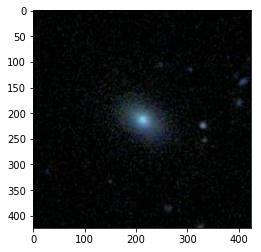

# 2 - Smooth galaxy image


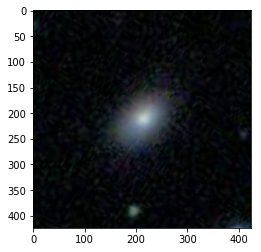

# 3 - Smooth galaxy image


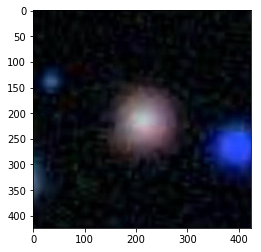

# 4 - Smooth galaxy image


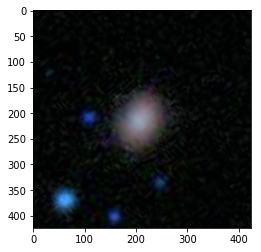

# 5 - Smooth galaxy image


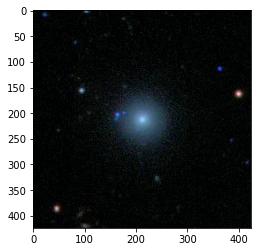

# 6 - Smooth galaxy image


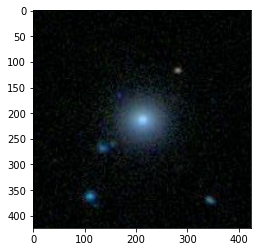

# 7 - Smooth galaxy image


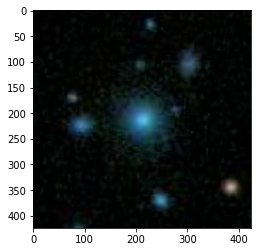

# 8 - Smooth galaxy image


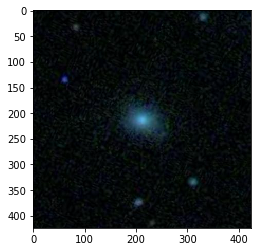

# 9 - Smooth galaxy image


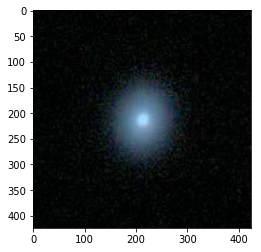

# 10 - Smooth galaxy image


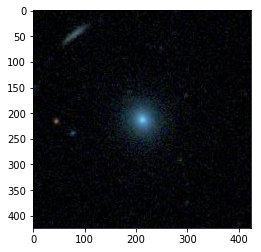

****************************************************
Liste de 10 images 'Spiral' sélectionnées au hasards
****************************************************

# 1 - Spiral galaxy image


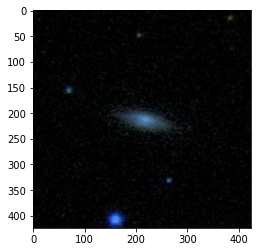

# 2 - Spiral galaxy image


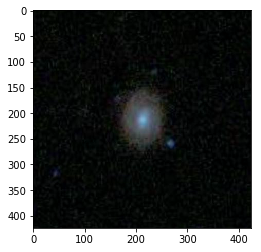

# 3 - Spiral galaxy image


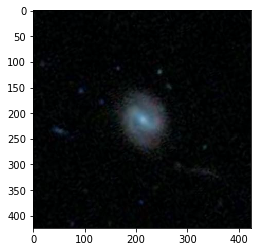

# 4 - Spiral galaxy image


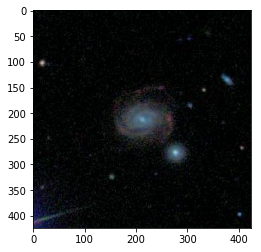

# 5 - Spiral galaxy image


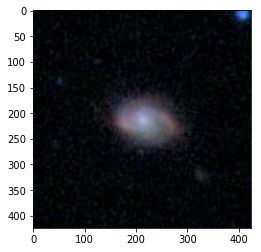

# 6 - Spiral galaxy image


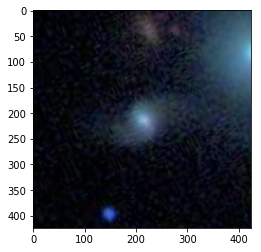

# 7 - Spiral galaxy image


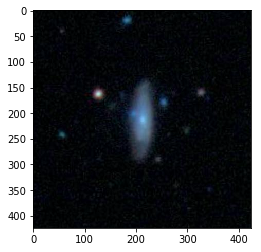

# 8 - Spiral galaxy image


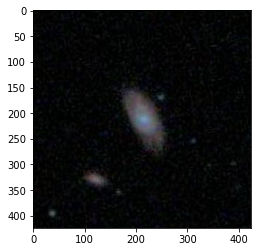

# 9 - Spiral galaxy image


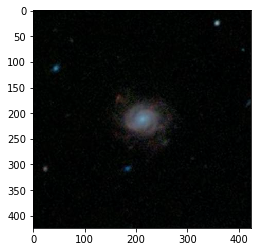

# 10 - Spiral galaxy image


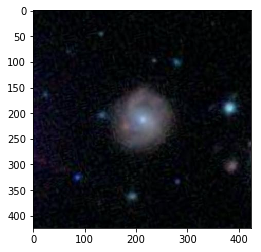

In [12]:
""""""""""""""""""
"  Exercice 2.3  "
""""""""""""""""""

import random
%matplotlib inline  
import matplotlib.pyplot as plt


# Constantes
RGB = 255
MAX_RANDOM = 10

# Remet les counter à leur état initial
smooth_count = 0
spiral_count = 0

# Liste avec les index selon le type d'images de la liste Y
smooth_index = []
spiral_index = []


# Sauvegarde les index selon la class d'image dans des listes 
for i in range(MAX_IMAGES):
    
    if SMOOTH in Y[i]:
        smooth_index.insert(smooth_count, i)
        smooth_count += 1
    
    if SPIRAL in Y[i]:
        spiral_index.insert(spiral_count, i)
        spiral_count += 1

# Genere au hasard une liste de 10 index entre 0 et 49 sans doublons selon le type
random_smooth_index = random.sample(list(smooth_index), MAX_RANDOM)
random_spiral_index = random.sample(list(spiral_index), MAX_RANDOM)

# Remet les counter à leur état initial
smooth_count = 0
spiral_count = 0

print("****************************************************")
print("Liste de 10 images 'Smooth' sélectionnées au hasards")
print("****************************************************\n")

# Pour les 10 index d'une image "Smooth" générés au hasards
for i in random_smooth_index:
    
    smooth_count += 1
    print("#", smooth_count, "- Smooth galaxy image")
   
    # Affiche une image de type "Smooth"
    plt.imshow(X[i] / RGB)
    plt.show()

print("****************************************************")
print("Liste de 10 images 'Spiral' sélectionnées au hasards")
print("****************************************************\n")

# Pour les 10 index d'une image "Spiral" générés au hasards
for i in random_spiral_index:
    
    spiral_count += 1
    print("#", spiral_count, "- Spiral galaxy image")
    
    # Affiche une image de type "Spiral"
    plt.imshow(X[i] / RGB)
    plt.show()



# Exercice 2.4

Séparer les données de la matrice X en 2 matrices avec un ratio de 70% (X_train) et 30% (X_test), ces 2 matrices doivent avoir le même nombre de classes. 

Faire la même chose pour (Y). Vérifiez que les données ont toujours les mêmes classes.


In [13]:
""""""""""""""""""
"  Exercice 2.4  "
""""""""""""""""""

# Constantes
TRAIN_QTY = int(MAX_IMAGES * 0.7)  # 70 données
TEST_QTY = int(MAX_IMAGES * 0.3)   # 30 données

TRAIN_SPLIT = int(TRAIN_QTY / 2)   # 35 données
TEST_SPLIT = int(TEST_QTY / 2)     # 15 données

# Train --> Listes "Smooth" et "Spiral" qui vont contenir 35 données chacunes
smooth_train_index = []
spiral_train_index = []

# Test --> Listes "Smooth" et "Spiral" qui vont contenir 15 données chacunes
smooth_test_index = []
spiral_test_index = []

# Variables
train_count = 0
test_count = 0


# Construction des listes X_train (70) et X_test (30)
X_train = np.zeros((TRAIN_QTY, IMG_HEIGHT, IMG_WIDTH, CHANNELS))
X_test = np.zeros((TEST_QTY, IMG_HEIGHT, IMG_WIDTH, CHANNELS))

# Construction des listes Y_train (70) et Y_test (30)
Y_train = np.zeros(TRAIN_QTY, dtype = "object")
Y_test = np.zeros(TEST_QTY, dtype = "object")



# Train [0-35] --> Insertion des 35 premiers index pour "Smooth" et "Spiral" 
for i in range(TRAIN_SPLIT) :
    smooth_train_index.insert(i, smooth_index[i])
    spiral_train_index.insert(i, spiral_index[i])

# Test [35-70] --> Insertion des 15 derniers index pour "Smooth" et "Spiral"
for i in range(TEST_SPLIT) :
    smooth_test_index.insert(i, smooth_index[i + TRAIN_SPLIT])
    spiral_test_index.insert(i, spiral_index[i + TRAIN_SPLIT])  
    

    
# Train [0-35] --> Insertion des 35 premières données "Smooth" pour "X" et "Y"    
for i in smooth_train_index:
    
    X_train[train_count] = X[i]
    Y_train[train_count] = Y[i]
    train_count += 1

# Train [35-70] --> Insertion des 35 dernières données "Spiral" pour "X" et "Y"  
for i in spiral_train_index:
    
    X_train[train_count] = X[i]
    Y_train[train_count] = Y[i]
    train_count += 1

    
    
# Test [0-15] --> Insertion des 15 premières données "Smooth" pour "X" et "Y"      
for i in smooth_test_index:
    
    X_test[test_count] = X[i]
    Y_test[test_count] = Y[i]
    test_count += 1

# Test [15-30] --> Insertion des 15 dernières données "Spiral" pour "X" et "Y"      
for i in spiral_test_index:
    
    X_test[test_count] = X[i]
    Y_test[test_count] = Y[i]
    test_count += 1
    

print("Taille X_train = ", len(X_train), "  |  Taille Y_train = ", len(Y_train))
print("\n", Y_train, "\n")

print("Taille X_test = ", len(X_test), "  |  Taille Y_test = ", len(Y_test))
print("\n", Y_test, "\n")


Taille X_train =  70   |  Taille Y_train =  70

 ['smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth'
 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth'
 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth'
 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth'
 'smooth' 'smooth' 'smooth' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral'
 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral'
 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral'
 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral'
 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral'] 

Taille X_test =  30   |  Taille Y_test =  30

 ['smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth'
 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'smooth' 'spiral'
 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral' 'spiral'
 'spiral' 'spiral' 'spiral' 'spiral' 'spira


# Exercice 2.5

Rogner (crop) toutes les images en utilisant le centre de l'image, la nouvelle dimension doit faire 50x50. 

Vous ne pouvez qu'utiliser la librairie Numpy pour cet exercice. 

Mettez tous ces images croppées dans une matrice nommée **X_train_crop**.


In [14]:
""""""""""""""""""
"  Exercice 2.5  "
""""""""""""""""""

# Constante 
H = 0  # hauteur
W = 1  # largeur

CROP_HEIGHT = 50
CROP_WIDTH = 50

HEIGHT_CENTER = CROP_HEIGHT / 2
WIDTH_CENTER = CROP_WIDTH / 2

# Variable
crop_count = 0

# Construction de la liste crop (image 50 x 50)
X_train_crop = np.zeros((TRAIN_QTY, CROP_HEIGHT, CROP_WIDTH, CHANNELS))


# Boucle autour des 70 données d'images de la liste X_train
for i in range(len(X_train)):

    start_y = int(X_train[i].shape[H] / 2 - HEIGHT_CENTER)
    start_x = int(X_train[i].shape[W] / 2 - WIDTH_CENTER)
    
    end_y = start_y + CROP_HEIGHT
    end_x = start_x + CROP_HEIGHT
    
    # Construction de la noouvelle image (50 x 50)
    X_train_crop[i] = X_train[i][start_y:end_y, start_x:end_x, :]


# Verification --> Genere au hasard 2 index de la liste X_train_crop [0-69]
random_index = random.sample(list(range(0,len(X_train_crop)-1)), 2)

print("Pour 2 images tirées au hasards de la nouvelle liste d'images (crop)\n")
print("Vérification #1 --> hauteur = ", X_train_crop[random_index[0]].shape[H], ", largeur = ", X_train_crop[random_index[0]].shape[W])
print("Vérification #2 --> hauteur = ", X_train_crop[random_index[1]].shape[H], ", largeur = ", X_train_crop[random_index[1]].shape[W])



Pour 2 images tirées au hasards de la nouvelle liste d'images (crop)

Vérification #1 --> hauteur =  50 , largeur =  50
Vérification #2 --> hauteur =  50 , largeur =  50



# Exercice 2.6

Afficher une image de chaque catégorie une fois que celle-ci a été recadrée.


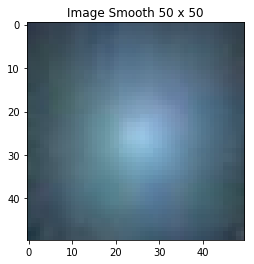

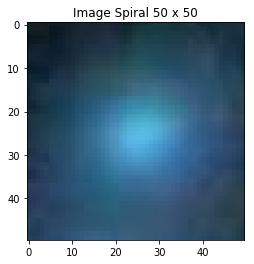

In [18]:
""""""""""""""""""
"  Exercice 2.6  "
""""""""""""""""""

# Primitives
smooth_displayed = False
spiral_displayed = False

# Pour les 70 valeurs de la liste X_train_crop
for i in range(len(X_train_crop)):
    
    # Si une image de type "Smooth" n'a jamais été affichée
    if SMOOTH in Y[i] and not smooth_displayed:
        smooth_displayed = True
        plt.title("Image Smooth 50 x 50")
        plt.imshow(X_train_crop[i] / RGB)
        plt.show()
    
    # Si une image de type "Spiral" n'a jamais été affichée
    if SPIRAL in Y[i] and not spiral_displayed:
        spiral_displayed = True
        plt.title("Image Spiral 50 x 50")
        plt.imshow(X_train_crop[i] / RGB)
        plt.show()
    
    # Si une image "Smooth" et "Spiral" ont été affichées, on sort de la boucle
    if smooth_displayed and spiral_displayed:
        break


# Exercice 2.7

En utilisant seulement Numpy, convertir les images en image binaires et mettez les dans une matrice **X_train_binary**. 

Pour rappel, une image binaire est une image dans laquelle la valeur des pixels n'est seulement {0, 1}.


Pour 2 images tirées au hasards de la nouvelle liste d'images (crop)



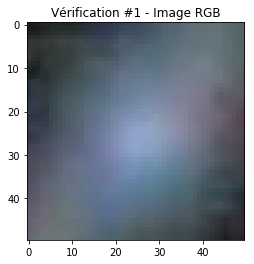

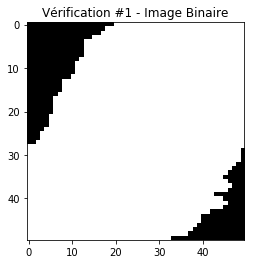

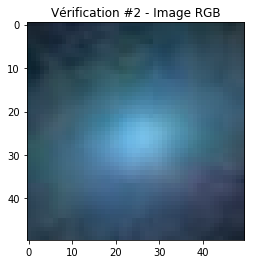

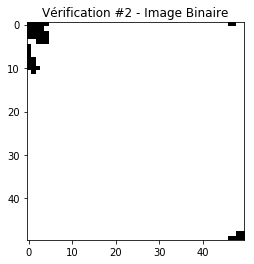

In [35]:
""""""""""""""""""
"  Exercice 2.7  "
""""""""""""""""""

# Constantes
R = 0  # red
G = 1  # green
B = 2  # blue
MIN = 0
MAX = 255

# Construction de la liste X_train_binary
X_train_binary = np.zeros((TRAIN_QTY, CROP_HEIGHT, CROP_WIDTH, CHANNELS))

# Boucle autour des 70 valeurs de la liste X_train_crop
for i in range(len(X_train_crop)) :
    
    # Récupère une image (crop) de la liste
    image = X_train_crop[i]
    
    # Recupere la moyenne des valeurs R, G et B de l'image
    _red   = np.mean(image[:][:][R])
    _green = np.mean(image[:][:][G])
    _blue  = np.mean(image[:][:][B])
    
    # Clone l'image pour la retravailler
    binary_image = image.copy()
    
    # Parcourt les pixels de l'image en hauteur et largeur
    for j in range(image.shape[H]):
        for k in range(image.shape[W]):
            
            # Récupère les pixels RGB de l'image
            red   = image[j][k][R]
            green = image[j][k][G]
            blue  = image[j][k][B]
            
            # Si une des valeurs R, G et B et supérieur à la moyenne, le pixel devient blanc
            if red > _red or green > _green or blue > _blue :
                binary_image[j][k] = [MAX,MAX,MAX]
            
            # Sinon, le pixel devient noir
            else :              
                binary_image[j][k] = [MIN,MIN,MIN]
    
    # Insère l'image binaire dans la liste
    X_train_binary[i] = binary_image

    
# Verification --> Genere au hasard 2 index de la liste X_train_crop [0-69]
random_index = random.sample(list(range(0,len(X_train_crop)-1)), 2)    

print("Pour 2 images tirées au hasards de la nouvelle liste d'images (crop)\n")

image_verif_1 = X_train_crop[random_index[0]]
plt.title("Vérification #1 - Image RGB")
plt.imshow(image_verif_1 / RGB)
plt.show()
    
binary_verif_1 = X_train_binary[random_index[0]]
plt.title("Vérification #1 - Image Binaire")
plt.imshow(binary_verif_1 / RGB)
plt.show() 

image_verif_2 = X_train_crop[random_index[1]]
plt.title("Vérification #2 - Image RGB")
plt.imshow(image_verif_2 / RGB)
plt.show()
    
binary_verif_2 = X_train_binary[random_index[1]]
plt.title("Vérification #2 - Image Binaire")
plt.imshow(binary_verif_2 / RGB)
plt.show() 





# Exercice 2.8

Pour chaque image, compter le nombre de pixels noirs et de pixels blancs, mettre tous les résultats dans une matrice **X_train_plot** avec la forme (nombre d'images, 2) où 2* est le nombre d'éléments dans une liste. 

Commentez la fonction de la matrice **X_train_plot**.


In [42]:
""""""""""""""""""
"  Exercice 2.8  "
""""""""""""""""""

# Variables
white_pixels = 0
black_pixels = 0

# Construction des matrices
X_train_plot = np.zeros((TRAIN_QTY, CHANNELS))
X_smooth_plot = np.zeros((TRAIN_QTY, CHANNELS))
X_spiral_plot = np.zeros((TRAIN_QTY, CHANNELS))


# Boucle autour des 70 images binaires
for i in range(len(X_train_binary)):
    
    # Récupère une image binaire de la liste
    bin_image = X_train_binary[i]
    
    # Parcourt les pixels de l'image binaire en hauteur et largeur
    for j in range(bin_image.shape[H]):
        for k in range(bin_image.shape[W]):
                
            red   = bin_image[j][k][R]
            green = bin_image[j][k][G]
            blue  = bin_image[j][k][B]
                
            # Si les valeurs R, G et B sont à 255, alors le pixel est blanc
            if red == MAX and green == MAX and blue == MAX :                
                white_pixels += 1
                
            # Sinon, le pixel est noir
            else :
                black_pixels += 1
                    
    # Insersation de la quantite de pixel noir et pixel blanc
    X_train_plot[i][1] = black_pixels 
    X_train_plot[i][2] = white_pixels
    
    # La quantite de pixel noir et pixel blanc pour une image "Smooth"
    if SMOOTH in Y_train[i] :
        X_smooth_plot[i][1] = black_pixels 
        X_smooth_plot[i][2] = white_pixels
    
    # La quantite de pixel noir et pixel blanc pour une image "Spiral"
    if SPIRAL in Y_train[i] :
        X_spiral_plot[i][1] = black_pixels 
        X_spiral_plot[i][2] = white_pixels




# Exercice 2.9

Afficher tous les points contenu dans **X_train_plot** sur un graphique en utlisant la librairie Matplotlib. 

Usez de votre jugement afin de représenter au mieux les données.


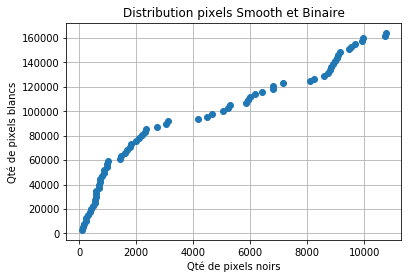

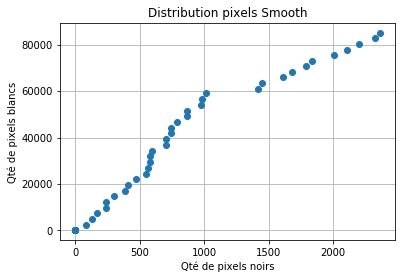

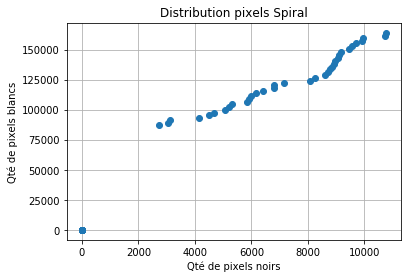

In [43]:
""""""""""""""""""
"  Exercice 2.9  "
""""""""""""""""""

# Constantes
BLACK = 1
WHITE = 2

MSG_AXE_X = "Qté de pixels noirs"
MSG_AXE_Y = "Qté de pixels blancs"

# Instances des listes de l'axe X et Y
axe_x = []
axe_y = []


# Boucle autour des images binaires "Smooth" et "Spiral"
for i in X_train_plot:
    axe_x.append(i[BLACK])
    axe_y.append(i[WHITE])

plt.title("Distribution pixels Smooth et Binaire")
plt.plot(axe_x, axe_y, 'o')
plt.xlabel(MSG_AXE_X)
plt.ylabel(MSG_AXE_Y)
plt.grid(True)
plt.show()

# Vide les listes de l'axe X et Y
axe_x = []
axe_y = []

# Boucle autour des images binaires "Smooth"
for i in X_smooth_plot:
    axe_x.append(i[BLACK])
    axe_y.append(i[WHITE])

plt.title("Distribution pixels Smooth")
plt.plot(axe_x, axe_y, 'o')
plt.xlabel(MSG_AXE_X)
plt.ylabel(MSG_AXE_Y)
plt.grid(True)
plt.show()

# Vide les listes de l'axe X et Y
axe_x = []
axe_y = []

# Boucle autour des images binaires "Spiral"
for i in X_spiral_plot:
    axe_x.append(i[BLACK])
    axe_y.append(i[WHITE])

plt.title("Distribution pixels Spiral")
plt.plot(axe_x, axe_y, 'o')
plt.xlabel(MSG_AXE_X)
plt.ylabel(MSG_AXE_Y)
plt.grid(True)
plt.show()

